<a href="https://colab.research.google.com/github/danfolador/recpadroes/blob/main/RecPad_Exercicio03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXERCÍCIO 03**

Aluno: Daniel Folador Rossi

Matrícula: 20201mpca0306


---
1. Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

2. Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

3. Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

4. Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.

5. Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).



In [1]:
#======================================================
# INICIALIZAÇÃO
#======================================================
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris



In [2]:
#======================================================
# BANCO DE DADOS
#======================================================
#bd = load_iris()
#X, y = bd.data, bd.target

#path_atual = "/content/drive/My Drive/!MestradoTemp/RecPad"
#path_atual = os.getcwd()
#bd_file = path_atual + '/' + 'Cryotherapy.xlsx'

bd_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00429/Cryotherapy.xlsx'
bd = pd.read_excel(bd_file) 
X  = bd.iloc[:, 0:-1]
y = bd.iloc[:, -1]

X = pd.DataFrame.to_numpy(X)
y = pd.DataFrame.to_numpy(y)

N_classes = len(set(y))
classes = set(y)

print("------------")
print(bd.keys())
print("X.shape=",X.shape)
print("y.shape=",y.shape)
print("No de classes=",N_classes)
print("classes=",classes)
print("------------")

------------
Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'Result_of_Treatment'],
      dtype='object')
X.shape= (90, 6)
y.shape= (90,)
No de classes= 2
classes= {0, 1}
------------


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


------------
modelo.intercept_= [12.91619502]
erro= 0.08888888888888889
modelo.intercept_.shape= (1,)
modelo.coef_.shape=  (1, 6)
------------


No handles with labels found to put in legend.
No handles with labels found to put in legend.


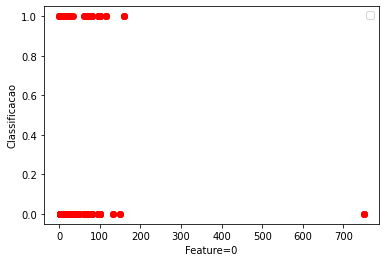

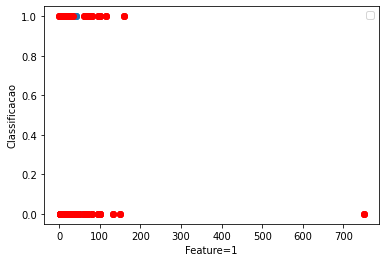

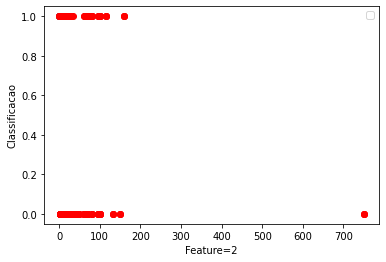

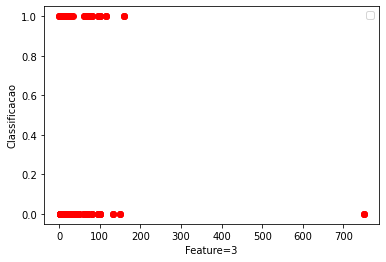

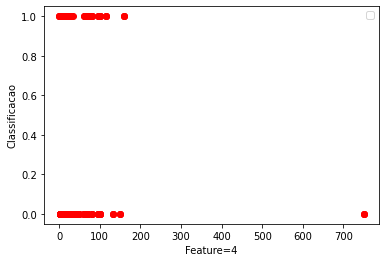

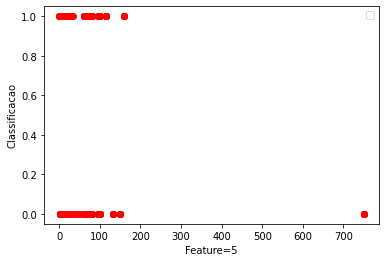

In [3]:
#======================================================
# TREINAMENTO
#======================================================
modelo = LogisticRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
erro= mean_squared_error(y, ypred)

print("------------")
print("modelo.intercept_=",modelo.intercept_)
print("erro=",erro)
print("modelo.intercept_.shape=",modelo.intercept_.shape)
print("modelo.coef_.shape= ", modelo.coef_.shape)
print("------------")

for i in range(X.shape[1]):

    plt.figure()
    plt.xlabel("Feature=" + str(i))
    plt.ylabel("Classificacao")
    plt.scatter(X[:,i], y)
    plt.plot(X, ypred, 'ro')
    plt.legend()



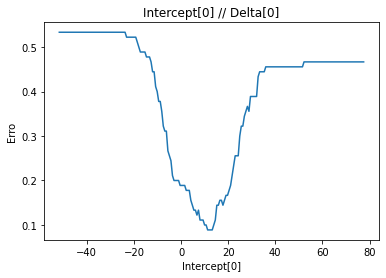

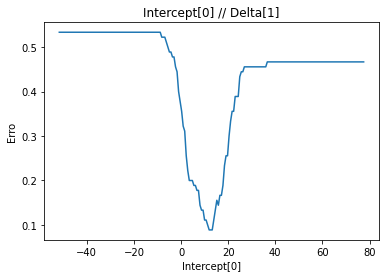

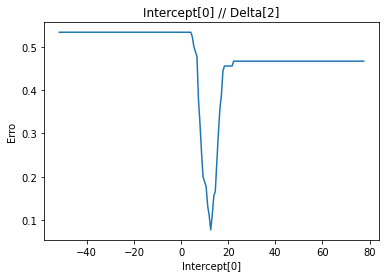

<Figure size 432x288 with 0 Axes>

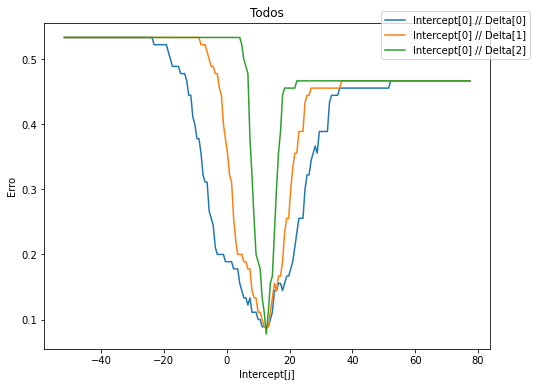

intercept_ini =  [12.91619502]
delta =  [array([15.49943402]), array([25.83239003]), array([64.58097509])]


In [4]:
#======================================================
# GRAFICO DO MSE
#======================================================
# obs
# intercept_.shape= (1,) se binário // (n_classes,) se multiclasse
# coef_.shape=  (1, n_features) se binário // (n_classes, n_features) se multiclasse

intercept_ini = modelo.intercept_                      
delta = [1.2*intercept_ini,2*intercept_ini,5*intercept_ini]

#Roda para k Deltas
arr=[]
for k in range(len(delta)):
    erros = []
    ws = np.linspace(intercept_ini-delta[k], intercept_ini+delta[k],200)
    for w in ws:
        modelo.intercept_ = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    arr.append(erros)    

for n in range(modelo.intercept_.shape[0]):
  for k in range(len(delta)):
    txt = "Intercept[" + str(n) + "]" + " // " + "Delta[" + str(k) + "]"
    plt.figure()
    plt.title(txt)
    plt.ylabel("Erro")
    plt.xlabel("Intercept[" + str(n) + "]")
    plt.plot(ws[:,n], arr[k])
    plt.show()


plt.figure()
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Todos")
plt.ylabel("Erro")
plt.xlabel("Intercept[j]")
for n in range(modelo.intercept_.shape[0]):
  for k in range(len(delta)):
    txt = "Intercept[" + str(n) + "]" + " // " + "Delta[" + str(k) + "]"
    plt.plot(ws[:,n], arr[k], label=txt)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

print("intercept_ini = ",intercept_ini)                      
print("delta = ",delta)          
        